In [ ]:
pip install pynverse   #install pynverse library which contains inversefunc which is used to calculate the inverse function 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6363 sha256=33bd501adece95051b37c46b235407a376d10357566bd1e86b624f21bc34ee63
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built pynverse


In [ ]:
#importing the necessary libraries
import numpy as np
from scipy import integrate
import math as m
from pynverse import inversefunc
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Constants 
H_0=67.7   #Hubble Constant
omega_m=0.31  
omega_l =0.69   #fraction of the energy of the universe due to the cosmological constant
omega_b=0.049   #current baryon mass density fraction of the universe
f_IGM= 0.83     #fraction of baryon mass in IGM
K_IGM=933
m_p=1.67*(10**-27)

In [ ]:
#P(z)=z*exp(-z)   Probabilty Distribution Function for redshift z
PDF= lambda z : z* m.exp(-z)
CDF= lambda z: 1-m.exp(-z)*(z+1)  # Cumulative Distribution Function

U=np.random.uniform(0,0.80,50)    # Generate 500 data points between 0 and 0.8 uniformly

z=[]
for i in range(len(U)):
  inv_CDF = inversefunc(CDF,U[i])    # Calculate the inverse function
  z=np.append(z,inv_CDF)    # Append the values of z in array z[]

z.sort()  #to sort the z array
z


array([0.19267595, 0.22970693, 0.2874608 , 0.33333115, 0.37025473,
       0.37267809, 0.46657189, 0.47050181, 0.51929631, 0.57305154,
       0.61827304, 0.67740907, 0.76370152, 0.78865294, 0.87362102,
       0.95334047, 1.00632385, 1.04921857, 1.07717566, 1.10232155,
       1.29119602, 1.29270562, 1.30730438, 1.4342289 , 1.43525522,
       1.45560216, 1.46876486, 1.47510293, 1.49185078, 1.59199461,
       1.72625953, 1.85992108, 1.8728381 , 1.91180731, 1.92328341,
       1.97620593, 2.19481457, 2.19824966, 2.29496201, 2.35958441,
       2.52326277, 2.52563923, 2.57904322, 2.58663442, 2.64702263,
       2.66215491, 2.77773024, 2.82918105, 2.8645949 , 2.93263895])

In [ ]:
# Create three empty array DM_IGM,DM_HG_loc and DM_E for storing the values of DM_IGM,DM_HG_loc and DM_E
DM_IGM=[]
DM_HG_loc=[]
DM_E=[]
function=lambda z:((7/8)*(1+z))/(0.31*pow(1+z,3)+0.69)**0.5
for i in range(0,50):
  Integration=integrate.quad(function,0,z[i])   #integrate.quad function , integrate the given funnction, func from 0 to z
  DM_IGM_f=K_IGM * Integration[0]    #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
  DM_IGM=np.append(DM_IGM,np.random.normal(DM_IGM_f,100))  #introduce a randomness by taking normal distribution N(DM_IGM,100 pc cm^(-3)) in DM_IGM
  DM_HG_loc=np.append(DM_HG_loc,np.random.normal(100,20))  #take DM_HG_loc as normal distribution N(100 pc cm^(-3),20 pc cm^(-3))
  DM_E_formula=DM_IGM[i]+(DM_HG_loc[i]/(1+z[i]))  #formula to calculate value of DM_E
  DM_E=np.append(DM_E,DM_E_formula)

#print(DM_IGM)
print(DM_HG_loc)
print(DM_E)

[127.56159141 101.88888791 111.78243652  91.24419569 102.38456843
 118.36594893 120.51373781 100.4413859   80.28969129 126.57480478
  80.24306027 118.63196135 113.50979788  99.04304454 111.81861299
 102.47314882  69.43309611  90.64221916 123.38232341 109.00636506
  91.22961238  79.41303237 102.07441645  96.89412733 100.05760104
 100.4644264   69.77908079  94.91668828 109.41849717  89.97564191
  76.27982907 112.66224079  98.52406075 103.09954238 102.63795951
  92.76792159 100.83360772 109.63641641  82.36936789  54.91215802
 110.39820696  76.02833968 113.52120789  79.6324894  113.93751703
 129.76243551 121.87448201 115.34821723  93.31904308 127.26471675]
[ 447.38235115  298.0043374   631.97863109  238.75454939  406.98099798
  385.1007174   441.69302746  479.42201031  512.12984108  651.83595154
  715.36415978  777.76654233  779.21295887  605.23766856  904.85577177
  961.06814929  904.83743529 1018.8063682  1012.02638821 1062.66234418
 1240.05897669 1324.46747525 1117.56497019 1350.5640428

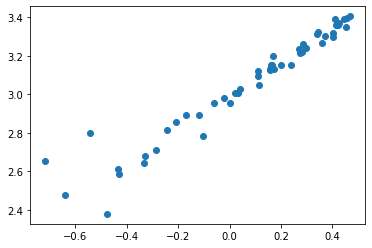

In [ ]:
log_DM_E=np.log10(DM_E)   # np.log10 calculate the log of all the data points in DM_E array and new array created is stored in log_DM_E
log_z=np.log10(z)  # np.log10 calculate the log of all the data points in z array and new array created is stored in log_z
plt.scatter(log_z,log_DM_E)   #Scatter plot between datapoints of log_DM_E and log_z array

[0.25060014 0.83932488 2.97191644]


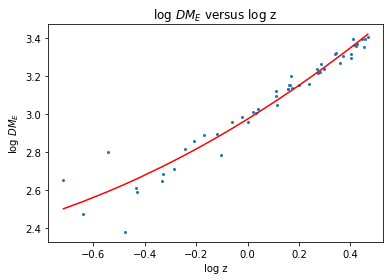

<Figure size 432x288 with 0 Axes>

In [ ]:
poly_deg = 2
p = np.polyfit(log_z,log_DM_E, poly_deg)
print(p)
y_fit = np.poly1d(p) #use np.poly1d to give the polynomial function corresponding to the coeffs. in p

#Plot the data and the fitted function:

plt.plot(log_z, y_fit(log_z), ls='-', label='polynomial of deg. {}'.format(poly_deg),color='red')

plt.scatter(log_z,log_DM_E,s=4)  # to plot scatter plot between log_z and log_DM_E
plt.xlabel("log z")
plt.ylabel("log $DM_{E}$")
plt.title("log $DM_{E}$ versus log z")
plt.show()
plt.savefig("50 Samples(z_f=3).jpg")

In [ ]:
#Range omega_m : 0-1
#Range K_IGM : 800 -1100
#Range DM_HG_loc : 60-120

#function to find chi_square
def find_chi_square(j,k):
  Sum=0      #Sum stores the values of chi_square for each value of K_IGM and Omega_matter 
  for i in range(50):
    func=lambda z:((7/8)*(1+z))/(j*pow(1+z,3)+(1-j))**0.5
    integration=integrate.quad(func,0,z[i])   #integrate.quad function , integrate the given funnction, func from 0 to z
    DM_igm=k * integration[0]    #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
    DM_e= DM_igm+ (77.06/(1+z[i]))   # Value of DM_HG_loc is fixed to 95.76
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum


In [ ]:
#create an empty array k_igm to store the values of K_IGM (Range : 800 to 1100)
#create an empty array Omega_matter to store the values of Omega_matter (Range : 0.001 to 0.500)
#create an empty array chi to store the chi square value corresponding to each value of K_IGM and Omega_matter
#two parameter fitting using DM_IGM and Omega_matter taking DM_HG_loc constant
k_igm=[]
Omega_matter=[]
chi=[]


for j in range(1,100):
  o_m= j*0.01
  for k in range(800,1100):
        chi_sq=find_chi_square(o_m,k)  #function call 
        chi = np.append(chi,chi_sq)
        k_igm=np.append(k_igm,k)
       
        Omega_matter=np.append(Omega_matter,o_m)
chi_min=min(chi)  #find the minimum value in the chi array and store it in chi_min
index= np.where(chi==chi_min)  #find the index where the minimum value is stored in chi array
print(index)
print('k_igm_min:',k_igm[index],'\t','Chi_Square Minimum:',chi_min,'\t','omega_m',Omega_matter[index])       #print the K_IGM and Omega_matter values corresponding to the value of chi square minimum

(array([13449]),)
k_igm_min: [1049.] 	 Chi_Square Minimum: 56.88814167680784 	 omega_m [0.45]


In [ ]:
d1=np.array([k_igm,Omega_matter]).T  #creating a numpy array of K_igm and Omega_matter
df=pd.DataFrame(data=d1, columns=["k_igm","Omega_matter"])  #create a dataframe using numpy array d1 
df['chi_square']=chi  #add a column chi_square to the dataframe
display(df)


,k_igm,Omega_matter,chi_square
0,800.0,0.01,4229.820562
1,801.0,0.01,4255.925321
2,802.0,0.01,4282.116745
3,803.0,0.01,4308.394835
4,804.0,0.01,4334.759591
...,...,...,...
29695,1095.0,0.99,539.641705
29696,1096.0,0.99,536.340631
29697,1097.0,0.99,533.051156
29698,1098.0,0.99,529.773278


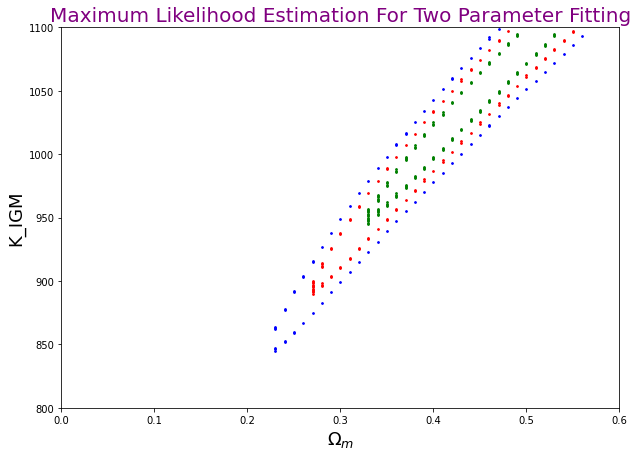

In [ ]:
#to plot the contour plot between K_IGM and Omega_matter 

plt.figure(figsize=(10,7))
for i in range(0,len(chi)):
  if (chi_min+2.3-0.4<=chi[i]<=chi_min+2.3+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="green",s=3)  #plot the points (colour:green) which lies between 1-sigma 
  if (chi_min+6.17-0.4<=chi[i]<=chi_min+6.17+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="red",s=3)  #plot the points (colour:red) which lies between 2-sigma 
  if (chi_min+11.8-0.4<=chi[i]<=chi_min+11.8+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="blue",s=3)  #plot the points (colour:blue) which lies between 3-sigma
  

# Plot

plt.scatter(k_igm[index],Omega_matter[index],color='black')

plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel('K_IGM',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.xlim(0,0.6)  #define the range of x axis
plt.ylim(800,1100)  #define the range of y axis

plt.show()

In [ ]:
#function to find the chi square
def find_chi_square1(j,l):
  Sum=0    #Sum stores the values of chi_square for each value of DM_HG_loc and Omega_matter
  for i in range(50):
    func=lambda z:((7/8)*(1+z))/(j*pow(1+z,3)+(1-j))**0.5
    integration=integrate.quad(func,0,z[i])  #integrate.quad function , integrate the given funnction, func from 0 to z
    DM_igm=992.75* integration[0]  #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
    DM_e= DM_igm+ (l/(1+z[i]))     #formula of DM_E
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum

In [ ]:
#create an empty array DM_HG_loc to store the values of DM_HG_loc (Range : 50 to 160)
#create an empty array Omega_matter_1 to store the values of Omega_matter (Range : 0.001 to 0.500)
#create an empty array chi_1 to store the chi square value corresponding to each value of DM_HG_loc and Omega_matter
#two parameter fitting using DM_HG_loc and Omega_matter taking DM_IGM constant

DM_hg_loc=[]
Omega_matter_1=[]
chi_1=[]


for j in range(1,500):
  o_m_1= j*0.001
  for l in range(50,140):
        chi_sq_1=find_chi_square1(o_m_1,l)   #function call 
        chi_1= np.append(chi_1,chi_sq_1)  #append the values chi_square into chi_1
        DM_hg_loc=np.append(DM_hg_loc,l)  #append the values DM_HG_loc into DM_HG_loc array
        Omega_matter_1=np.append(Omega_matter_1,o_m_1)  #append the value of Omega_matter into Omega_matter_1 array
chi_min_1=min(chi_1)   #find the minimum value in the chi_1 array and store it in chi_min
index_1= np.where(chi_1==chi_min_1)   #find the index where the minimum value is stored in chi array
print(index_1)
print('Chi_Square Minimum:',chi_min_1,'\t',chi_min_1,'\t','omega_m',Omega_matter_1[index_1],'\tDM_HG_loc',DM_hg_loc[index_1])  #print the DM_HG_loc and Omega_matter values corresponding to the value of chi square minimum 

(array([35271]),)
Chi_Square Minimum: 55.23978401395032 	 55.23978401395032 	 omega_m [0.392] 	DM_HG_loc [131.]


In [ ]:
d2=np.array([DM_hg_loc,Omega_matter_1]).T   #creating a numpy array of DM_HG_loc and Omega_matter
df2=pd.DataFrame(data=d2, columns=["DM_HG_loc","Omega_matter"])  #create a dataframe using numpy array d2
df2['chi_square']=chi_1     #add a column chi_square to the dataframe
display(df2)

,DM_HG_loc,Omega_matter,chi_square
0,50.0,0.001,13924.715688
1,51.0,0.001,13928.448340
2,52.0,0.001,13932.183312
3,53.0,0.001,13935.920604
4,54.0,0.001,13939.660216
...,...,...,...
44905,135.0,0.499,116.382935
44906,136.0,0.499,116.076534
44907,137.0,0.499,115.772453
44908,138.0,0.499,115.470692


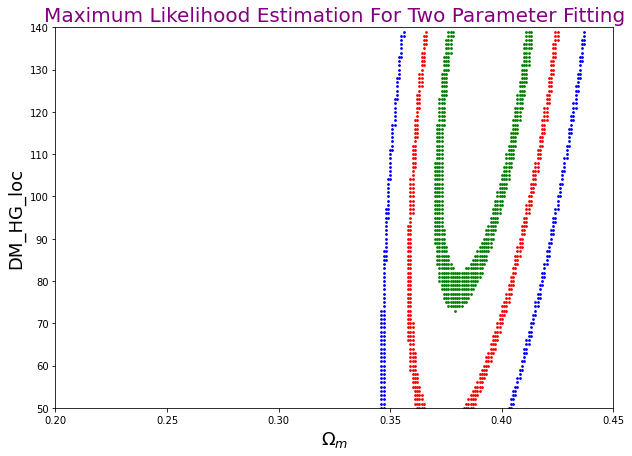

In [ ]:
#to plot the contour plot between DM_HG_loc and Omega_matter
plt.figure(figsize=(10,7))
for i in range(0,len(chi_1)):
  if (chi_min_1+2.3-0.4<=chi_1[i]<=chi_min_1+2.3+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="green",s=3)  #plot the points (colour:green) which lies between 1-sigma 
  if (chi_min_1+6.17-0.4<=chi_1[i]<=chi_min_1+6.17+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="red",s=3)  #plot the points (colour:red) which lies between 2-sigma
  if (chi_min_1+11.8-0.4<=chi_1[i]<=chi_min_1+11.8+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="blue",s=3)  #plot the points (colour:blue) which lies between 3-sigma
 


#Plot
plt.scatter(DM_hg_loc[index_1],Omega_matter_1[index_1],color='black')
plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel('DM_HG_loc',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.xlim(0.20,0.45)   #define the range of x axis
plt.ylim(50,140)  #define the range of y axis
plt.show()

In [ ]:
#function to find the chi square
def find_chi_square2(j,l):
  Sum=0  #Sum stores the values of chi_square for each value of DM_HG_loc and  K_IGM
  for i in range(50):
    func=lambda z:((7/8)*(1+z))/(0.38*pow(1+z,3)+(1-0.38))**0.5  
    integration=integrate.quad(func,0,z[i])   #integrate.quad function , integrate the given funnction, func from 0 to z 
    DM_igm=k* integration[0]  #formula to find the value of DM_IGM, integration[0] stores the result of integration of function , func
    DM_e= DM_igm+ (l/(1+z[i]))  #formula of DM_E
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum

In [ ]:
# Create an empty array DM_HG_loc_1 to store the values of DM_HG_loc (Range : 60 to 120)
# Create an empty array k_igm_1 to store the values of K_IGM (Range : 800 to 1100)
# Create an empty array chi_2 to store the chi square value corresponding to each value of DM_HG_loc and k_igm
# Two parameter fitting using DM_HG_loc and k_igm taking Omega_matter constant

DM_hg_loc_1=[]
k_igm_1=[]
chi_2=[]
for k in range(800,1100):
  for l in range(50,140):
        chi_sq_2=find_chi_square2(k,l)    # Function call 
        chi_2= np.append(chi_2,chi_sq_2)  # Append the values chi_square into chi_2
        k_igm_1=np.append(k_igm_1,k)   # Append the values k_igm into k_igm_1 array
        DM_hg_loc_1=np.append(DM_hg_loc_1,l)  # Append the value of Omega_matter into DM_hg_loc_1 array
        
chi_min_2=min(chi_2)   # Find the minimum value in the chi_1 array and store it in chi_min
index_2= np.where(chi_2==chi_min_2)  # Find the index where the minimum value is stored in chi array
print(index_2)
print('Chi_Square Minimum:',chi_min_2,'\t','K_IGM',k_igm_1[index_2],'\tDM_HG_loc',DM_hg_loc_1[index_2])    # Print the DM_HG_loc and k_igm values corresponding to the value of chi square minimum    

(array([16289]),)
Chi_Square Minimum: 55.057112535613065 	 K_IGM [980.] 	DM_HG_loc [139.]


In [ ]:
d3=np.array([DM_hg_loc_1,k_igm_1]).T  # Creating a numpy array of DM_hg_loc and K_igm
df3=pd.DataFrame(data=d3, columns=["DM_HG_loc","K_IGM"]) # Create a dataframe using numpy array d3
df3['chi_square']=chi_2  # Add a column chi_square to the dataframe
display(df3)

,DM_HG_loc,K_IGM,chi_square
0,50.0,800.0,506.875889
1,51.0,800.0,505.791989
2,52.0,800.0,504.710410
3,53.0,800.0,503.631151
4,54.0,800.0,502.554212
...,...,...,...
26995,135.0,1099.0,210.072125
26996,136.0,1099.0,210.639014
26997,137.0,1099.0,211.208223
26998,138.0,1099.0,211.779752


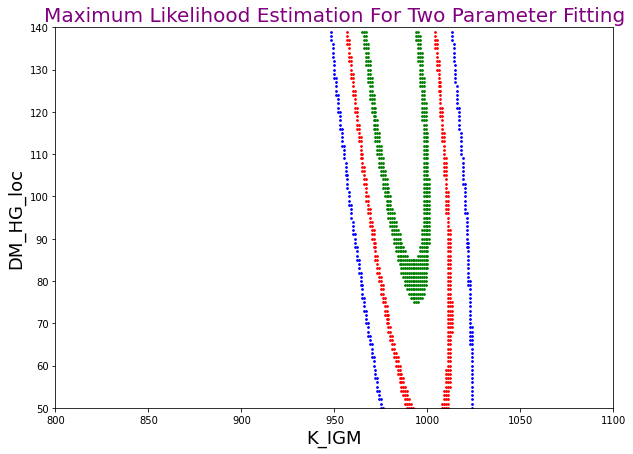

In [ ]:
# To plot the contour plot between DM_HG_loc and K_IGM
plt.figure(figsize=(10,7))
for i in range(0,len(chi_2)):
  if (chi_min_2+2.3-0.4<=chi_2[i]<=chi_min_2+2.3+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="green",s=3) # Plot the points (colour:green) which lies between 1-sigma 
  if (chi_min_2+6.17-0.4<=chi_2[i]<=chi_min_2+6.17+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="red",s=3) # Plot the points (colour:red) which lies between 2-sigma 
  if (chi_min_2+11.8-0.4<=chi_2[i]<=chi_min_2+11.8+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="blue",s=3) # Plot the points (colour:blue) which lies between 3-sigma 
 


#Plot
plt.scatter(DM_hg_loc_1[index_2],k_igm_1[index_2],color='black')
plt.xlabel('K_IGM',size='18')
plt.ylabel('DM_HG_loc',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.xlim(800,1100)   # Define the range of x-axis
plt.ylim(50,140)  # Define the range of y-axis
plt.show()